In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/user-hotel-ratings-data/user_hotel_interactions.csv
/kaggle/input/user-hotel-ratings-data/preprocessed_hotel_data_final_new.csv
/kaggle/input/user-hotel-ratings-data/user_profiles.csv


In [2]:
processed_data = pd.read_csv("/kaggle/input/user-hotel-ratings-data/preprocessed_hotel_data_final_new.csv")
processed_data

,hotel_name,hotel_id,rating,rating_description,review_count,star_rating,location,nearest_landmark,Distance_to_Landmark(in_km),price_per_night,...,amenity_business_center,amenity_meeting_rooms,amenity_bar,amenity_swimming_pool,amenity_parking,amenity_travel_desk,amenity_airport_shuttle,amenity_conference_hall,amenity_valet_parking,total_amenities_count
0,The Park Bangalore,806,3.9,Very Good,4187.0,5.0,Ulsoor,Unknown,-1.00,7567.0,...,0,0,0,0,0,0,0,0,0,0
1,"Keys Select by Lemon Tree Hotels, Whitefield, ...",1821,4.0,Very Good,2201.0,4.0,Brookefield,Unknown,-1.00,1509.0,...,0,0,0,0,0,0,0,0,0,0
2,ITC Windsor - A Luxury Collection Hotel,2427,4.4,Excellent,1315.0,5.0,Vasanth Nagar,Bangalore Palace,2.40,9900.0,...,0,0,0,0,0,0,0,0,0,0
3,Lemon Tree Premier Ulsoor Lake Bangalore,2685,4.0,Very Good,5089.0,5.0,Sivanchetti Gardens,Ulsoor Lake,0.77,2347.0,...,0,0,0,0,0,0,0,0,0,0
4,"Keys Select by Lemon Tree Hotels, Hosur Road, ...",34,4.0,Very Good,3290.0,4.0,Hosur road,Unknown,-1.00,2522.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4627,Amby Inn,4427,3.6,Unknown,81.0,-1.0,Unknown,Unknown,-1.00,4300.0,...,0,0,0,0,0,0,0,0,0,3
4628,Park Inn,467,3.4,Unknown,232.0,-1.0,Unknown,Unknown,-1.00,4300.0,...,0,0,0,0,0,0,0,0,0,3
4629,Sarovar Portico,3093,3.8,Unknown,407.0,-1.0,Unknown,Unknown,-1.00,4300.0,...,0,0,1,0,0,0,0,0,0,2
4630,Sheraton,3773,4.1,Unknown,409.0,-1.0,Unknown,Unknown,-1.00,4300.0,...,0,0,0,0,0,0,0,0,0,3


In [3]:
user_hotel_interactions_data = pd.read_csv("/kaggle/input/user-hotel-ratings-data/user_hotel_interactions.csv")
user_hotel_interactions_data

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,interaction_id,user_id,hotel_id,interaction_type,interaction_date,rating,total_amount_inr,stay_duration,travel_purpose,advance_booking_days,cancellation_flag
0,1,1,70,Booked,2023-12-16,5.0,18468,5.0,Family_vacation,3.0,False
1,2,1,115,Booked,2023-10-18,5.0,37004,1.0,Family_vacation,0.0,False
2,3,1,123,Booked,2023-06-08,4.3,8322,4.0,Business,1.0,False
3,4,1,57,Reviewed,2023-03-24,4.6,40845,NaN,NaN,NaN,NaN
4,5,1,228,Reviewed,2023-07-06,5.0,7961,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1283,1284,299,369,Booked,2023-04-01,4.7,29525,5.0,Leisure,2.0,False
1284,1285,299,158,Reviewed,2023-10-30,5.0,42030,NaN,NaN,NaN,NaN
1285,1286,300,209,Reviewed,2023-05-20,4.1,6570,NaN,NaN,NaN,NaN
1286,1287,300,81,Booked,2023-09-21,5.0,13509,4.0,Leisure,0.0,False


In [4]:
user_profiles_data = pd.read_csv("/kaggle/input/user-hotel-ratings-data/user_profiles.csv")
user_profiles_data

,user_id,age_group,gender,home_city,home_state,income_bracket_inr,family_type,budget_min_inr,budget_max_inr,vegetarian_preference,business_travel_frequency,travel_frequency,location_preference,booking_advance_days,preferred_amenities,interaction_count
0,1,30-40,Male,Pune,Maharashtra,15L+,Family_with_kids,7500,18000,False,0.37,Regular,Transport_hub,1,"[""pool"", ""family_rooms"", ""parking""]",6
1,2,50-60,Male,Bangalore,Karnataka,25L+,Couple,9600,24000,False,0.10,Occasional,Transport_hub,2,"[""spa"", ""gym"", ""room_service""]",3
2,3,22-30,Male,Chennai,Tamil Nadu,3-6L,Solo,1500,4000,True,0.52,Regular,City_center,10,"[""free_wifi"", ""business_center"", ""airport_shut...",4
3,4,22-30,Male,Kolkata,West Bengal,3-6L,Couple,1800,4800,False,0.65,Occasional,City_center,7,"[""free_wifi"", ""business_center"", ""airport_shut...",3
4,5,22-30,Male,Chennai,Tamil Nadu,10-15L,Solo,3500,8000,False,0.19,Regular,City_center,35,"[""free_wifi"", ""restaurant"", ""parking""]",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,22-30,Female,Hyderabad,Telangana,6-10L,Solo,2500,6000,False,0.22,Occasional,City_center,3,"[""free_wifi"", ""restaurant"", ""parking""]",3
296,297,22-30,Male,Mumbai,Maharashtra,3-6L,Solo,1500,4000,False,0.13,Frequent,Quiet_area,17,"[""free_wifi"", ""restaurant"", ""parking""]",7
297,298,40-50,Female,Chennai,Tamil Nadu,25L+,Couple,9600,24000,False,0.58,Occasional,City_center,26,"[""free_wifi"", ""business_center"", ""airport_shut...",3
298,299,30-40,Female,Kolkata,West Bengal,10-15L,Couple,4200,9600,False,0.10,Regular,Transport_hub,10,"[""free_wifi"", ""restaurant"", ""parking""]",6


In [5]:
#matrix = user_hotel_interactions_data.pivot_table(
    #index="user_id",
    #columns="hotel_id",
    #values="rating"
#).fillna(0)

In [6]:
#matrix

In [7]:
#from scipy.sparse import csr_matrix
#matrix_csr = csr_matrix(matrix.values)

In [8]:
#print("Shape of CSR matrix:", matrix_csr.shape)
#print("Number of stored elements (non-zero):", matrix_csr.nnz)

In [9]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(user_hotel_interactions_data[['user_id', 'hotel_id', 'rating']], reader)
algo = SVD(n_factors=50, random_state=42)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
trainset = data.build_full_trainset()
algo.fit(trainset)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.6643  0.7011  0.5876  0.7011  0.6043  0.6517  0.0478  
MAE (testset)     0.5138  0.5205  0.4662  0.5383  0.4761  0.5030  0.0274  
Fit time          0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Test time         0.01    0.00    0.00    0.00    0.00    0.00    0.00    


In [10]:
prediction = algo.predict(uid=1, iid=70)
print("Predicted rating for user 1 on hotel 70:", prediction.est)

Predicted rating for user 1 on hotel 70: 4.80715849783716


In [11]:
hotel_mapping = processed_data[['hotel_id', 'hotel_name']].drop_duplicates()
all_hotels = user_hotel_interactions_data['hotel_id'].unique()

def get_top_n_recommendations(user_id, n=5):
    rated_hotels = user_hotel_interactions_data[user_hotel_interactions_data['user_id'] == user_id]['hotel_id'].unique()
    hotels_to_predict = [h for h in all_hotels if h not in rated_hotels]
    predictions = [algo.predict(user_id, h) for h in hotels_to_predict]
    predictions.sort(key=lambda x: x.est, reverse=True)
    top_n = predictions[:n]
    df = pd.DataFrame([(pred.iid, pred.est) for pred in top_n], columns=["hotel_id", "predicted_rating"])
    df = df.merge(hotel_mapping, on="hotel_id", how="left")
    df = df[["hotel_id", "hotel_name", "predicted_rating"]]
    
    return df

In [12]:
top_hotels = get_top_n_recommendations(101, n=5)
print(top_hotels)

   hotel_id                                   hotel_name  predicted_rating
0       313  Anjuna 4BR Luxury Villa Aman w/private pool          4.896768
1       107                                 BISWAS HOTEL          4.758625
2       260                                   Blue bells          4.732575
3       212                             Koenig Inn Delux          4.730184
4       341                                   Ever Green          4.723176


In [13]:
import pickle
with open("svd_hotel_model.pkl", "wb") as f:
    pickle.dump(algo, f)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
hotel_factors = algo.qi
hotel_ids = [algo.trainset.to_raw_iid(inner_id) for inner_id in range(algo.trainset.n_items)]
hotel_factors_df = pd.DataFrame(
    hotel_factors[:, :5],
    index=hotel_ids,
    columns=[f"Feature_{i+1}" for i in range(5)]
)
hotel_factors_df = hotel_factors_df.reset_index().rename(columns={"index": "hotel_id"})
hotel_factors_df = hotel_factors_df.merge(
    processed_data[["hotel_id", "hotel_name"]],
    on="hotel_id",
    how="left"
)

In [17]:
for feature in hotel_factors_df.columns[1:6]:
    print(f"\nTop hotels for {feature}:")
    print(hotel_factors_df.sort_values(by=feature, ascending=False)[["hotel_name", feature]].head(5))    
    print(f"\nBottom hotels for {feature}:")
    print(hotel_factors_df.sort_values(by=feature, ascending=True)[["hotel_name", feature]].head(5))


Top hotels for Feature_1:
                                            hotel_name  Feature_1
73                                         Lar Amorosa   0.296997
120                             Vishal Residency Hotel   0.219433
160                                           Shalimar   0.218433
36                                        YKS Sizzlers   0.212187
9    Dona Paula Luxury 10BR Villa Skyline w/jacuzzi...   0.209064

Bottom hotels for Feature_1:
             hotel_name  Feature_1
304       Hotel Airways  -0.265258
27   Hotel Marine Plaza  -0.254034
6      Mind Space Hotel  -0.241799
230          b nineteen  -0.219902
213         Royal Hotel  -0.219729

Top hotels for Feature_2:
              hotel_name  Feature_2
77   Gandhi Bhavan Hotel   0.414856
221             Mid Town   0.250918
169              Pillers   0.242876
228              Fidalgo   0.227609
235     Bishwanath Dhaam   0.213366

Bottom hotels for Feature_2:
                hotel_name  Feature_2
271  Comfort Inn President

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
) missing from current font.st-packages/seaborn/utils.py:80: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from current font.st-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


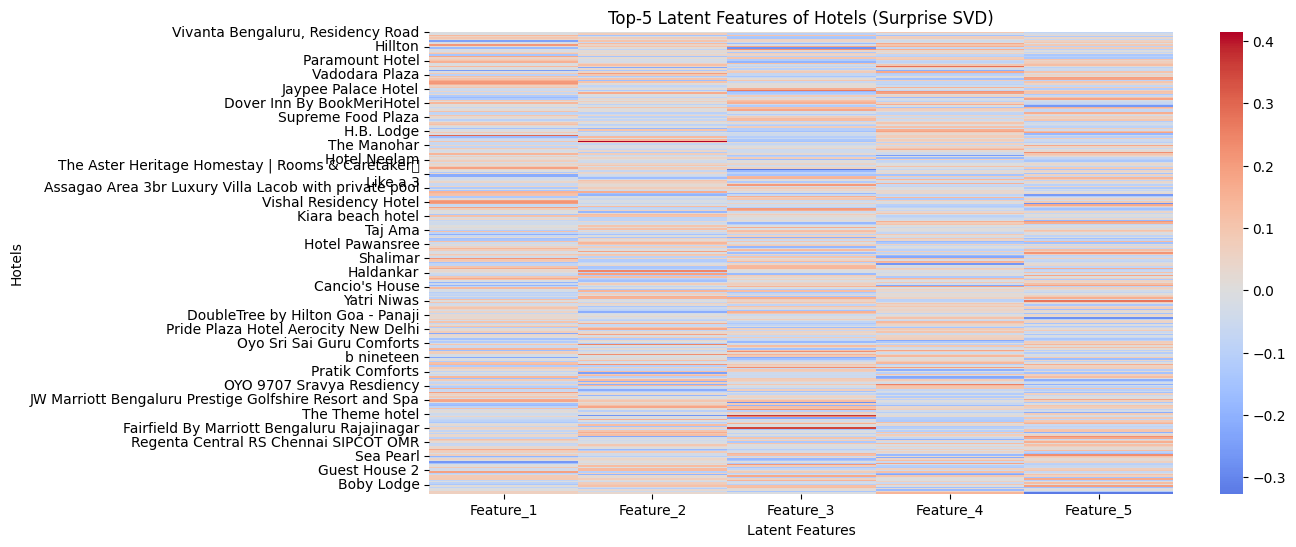

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    hotel_factors_df.set_index("hotel_name").iloc[:, 1:6],
    cmap="coolwarm",
    center=0
)
plt.title("Top-5 Latent Features of Hotels (Surprise SVD)")
plt.xlabel("Latent Features")
plt.ylabel("Hotels")
plt.show()

In [21]:
from surprise.model_selection import train_test_split
from surprise import accuracy
from collections import defaultdict

In [31]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

algo = SVD(n_factors=50, random_state=42)
algo.fit(trainset)

predictions = algo.test(testset)

print("RMSE:", accuracy.rmse(predictions))
print("MAE:", accuracy.mae(predictions))

def precision_recall_f1_at_k(predictions, k=5, threshold=3.5):
    """Return precision, recall and f1 at k metrics (per user)."""
    user_est_true = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid].append((iid, est, true_r))

    precisions, recalls, f1_scores = dict(), dict(), dict()

    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, _, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (_, est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (_, est, true_r) in user_ratings[:k]
        )
        precision = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        precisions[uid] = precision
        recall = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
        recalls[uid] = recall

        if precision + recall > 0:
            f1_scores[uid] = 2 * (precision * recall) / (precision + recall)
        else:
            f1_scores[uid] = 0

    return precisions, recalls, f1_scores

precisions, recalls, f1_scores = precision_recall_f1_at_k(predictions, k=5, threshold=3.5)

print("Average Precision:", sum(precisions.values()) / len(precisions))
print("Average Recall:", sum(recalls.values()) / len(recalls))
print("Average F1:", sum(f1_scores.values()) / len(f1_scores))

RMSE: 0.6383
RMSE: 0.6383035070213257
MAE:  0.4865
MAE: 0.4865496016657557
Average Precision: 0.8767045454545456
Average Recall: 0.9147727272727273
Average F1: 0.8893308080808082
